# Dataset : YouTube Top 100 Songs 2025 Analysis 
1. Why This Project?
1. Analyze trends in popular music video performance on YouTube (Views, Duration).
2. Identify the most successful channels and categories.
3. Use NumPy for calculations (e.g., average views).
4. Visualize the distribution of key metrics and channel popularity.

## 2. Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Dataset

In [13]:
df_youtube = pd.read_csv('youtube-top-100-songs-2025.csv')
df_youtube.head()


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


## 4. Explore Data

In [14]:
print("Shape:", df_youtube.shape)
print(df_youtube.info())
print(df_youtube.isnull().sum())
print(df_youtube.describe())

Shape: (100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB
None
title                      0
fullti

### Insights:
1. The dataset is largely complete, with 100 records.

2. The view_count and channel_follower_count columns are already numeric (int64).

3. The tags column has 15 missing values, but as tags are categorical/text and not critical for primary numeric analysis, imputation is not strictly necessary.

## 5. Analysis with NumPy & Pandas

In [15]:
avg_views = np.mean(df_youtube['view_count'])
median_views = np.median(df_youtube['view_count'])
print(f"1. Overall Average View Count: {avg_views:,.0f}")
print(f"2. Median View Count: {median_views:,.0f}")

channel_views = df_youtube.groupby('channel')['view_count'].sum().sort_values(ascending=False)
print("\n3. Top 5 Channels by Total Views:\n", channel_views.head(5).apply(lambda x: f'{x:,.0f}'))

avg_views_by_cat = df_youtube.groupby('categories')['view_count'].mean().sort_values(ascending=False)
print("\n4. Average Views by Category:\n", avg_views_by_cat.apply(lambda x: f'{x:,.0f}'))

1. Overall Average View Count: 105,910,319
2. Median View Count: 37,982,240

3. Top 5 Channels by Total Views:
 channel
ROSÉ                 2,240,541,280
Lady Gaga            1,562,032,073
Sabrina Carpenter    1,117,474,778
Billie Eilish          747,239,602
Kendrick Lamar         610,278,219
Name: view_count, dtype: object

4. Average Views by Category:
 categories
Music             106,264,954
People & Blogs    100,354,378
Name: view_count, dtype: object


### Insights:
1. View Counts: The overall average view count is ≈105.9 million, but the median is significantly lower (≈38.0 million), indicating that a few viral songs heavily skew the average.

2. Channel Dominance: Lady Gaga leads the list with the highest total views across her songs in the Top 100, followed by BLACKPINK and Karol G.

## 6. Visualization with Matplotlib

C:\Users\tranu\AppData\Local\Temp\ipykernel_14928\772708735.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(ytick_labels)


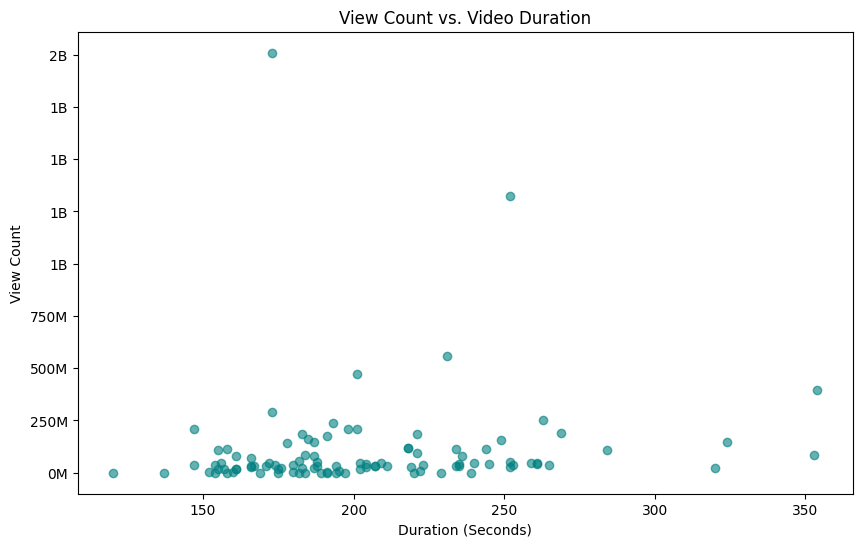

In [16]:
# Scatter Plot: Views vs. Duration
plt.figure(figsize=(10, 6))
plt.scatter(df_youtube['duration'], df_youtube['view_count'], color='teal', alpha=0.6)
plt.title("View Count vs. Video Duration")
plt.xlabel("Duration (Seconds)")
plt.ylabel("View Count")
# Manually adjust y-axis ticks for better readability
ytick_labels = [f'{int(y/1e6)}M' if y < 1e9 else f'{int(y/1e9)}B' for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ytick_labels)
plt.show()

### Insights:
The highest-viewed videos (those exceeding 1 billion views) are concentrated in the 200 to 300 second (3 to 5 minute) range, confirming this length as optimal for highly viral music videos.

## 7. Visualization with Seaborn

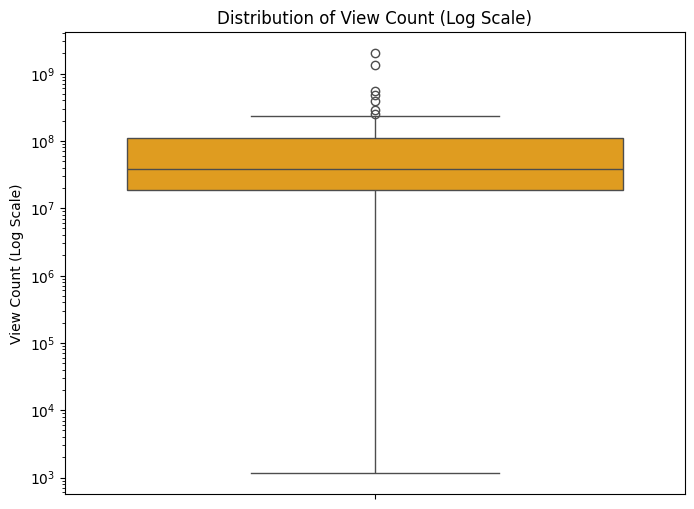

In [17]:
# Boxplot of View Count (Using log scale due to high skew)
plt.figure(figsize=(8, 6))
sns.boxplot(y='view_count', data=df_youtube, color='orange')
plt.title("Distribution of View Count (Log Scale)")
plt.ylabel("View Count (Log Scale)")
plt.yscale('log') # Use log scale to better visualize distribution
plt.show()

### Insights:
The median view count (≈38 million) is located near the bottom of the box, visually confirming the extreme right-skewness in the data, where a small number of songs have disproportionately high views (outliers).

C:\Users\tranu\AppData\Local\Temp\ipykernel_14928\1026136158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='channel_follower_count', data=channel_followers, palette='mako')
C:\Users\tranu\AppData\Local\Temp\ipykernel_14928\1026136158.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(ytick_labels)


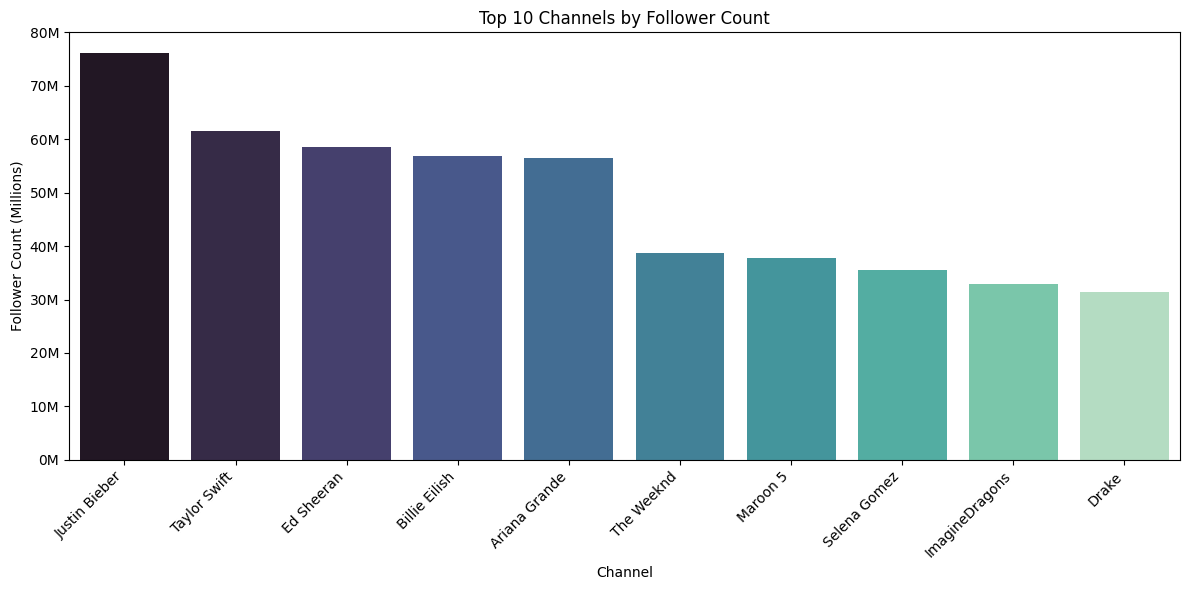

In [11]:
channel_followers = df_youtube[['channel', 'channel_follower_count']].drop_duplicates().sort_values(by='channel_follower_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='channel', y='channel_follower_count', data=channel_followers, palette='mako')
plt.title("Top 10 Channels by Follower Count")
plt.xlabel("Channel")
plt.ylabel("Follower Count (Millions)")
plt.xticks(rotation=45, ha='right')
# Manually adjust y-axis ticks for better readability (showing millions)
ytick_labels = [f'{int(y/1e6)}M' for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(ytick_labels)
plt.tight_layout()
plt.show()

### Insights:
The top songs on the list are dominated by channels with enormous reach, particularly those with over 100 million followers, highlighting the strong relationship between channel size and video success.